<a href="https://colab.research.google.com/github/Soumo31428/Ridge-Lasso-Regression/blob/main/Ridge%2C_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Algerian Forest Fires Dataset**

Dataset information:

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the nortest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attributes and 1 output attribute(class). The 244-instances have been classified into fire(138 classes) and not fire(106 classes) classes.

**Attribute Information:**
1. Date: (DD/MM/YYYY) Day, month('june' to 'september'), year(2012) weather data observatios.
2. Temp: temparature noon(temparature max) in Celsius degrees: 22 to 42
3. RH: Relative Humanity in % 21 to 90
4. Rain: total day in mm: 0 to 16.8 FWI components
5. Ws: Wind speed inkm/h: 6 to 29
6. Fine Fuel Moisture Code(FFmc): index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code(DMC): index from FWI system: 1.1 to 65.9
8. Drought Code(DC): index from FWI system: 7 to 220.4
9. Initial Spread Index(ISI): index from FWI system: 0 to 18.5
10. Buildup Index(BUI): index from FWI system: 1.1 to 68
11. Fire Weather Index(FWI): index: 0 to 31.1
12. Classes: two classes, namely Fire and not fire.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [4]:
## Missing Values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The datset is converted into two sets based on Region from 122th index, we can make a new column based on the Region.

"Bejaia Region Dataset"

"Sidi-Bel Abbes Region Dataset"

Add new column with region

In [5]:
df.loc[:122,'Region'] = 0
df.loc[122:,"Region"] = 1

In [6]:
df[["Region"]] = df[["Region"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [8]:
## Removing the null values
df.dropna().reset_index(drop= True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.iloc[[167]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [10]:
df = df.drop([122,167]).reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
## fix spaces in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Changes the required columns as integer data type

In [14]:
## Change the required columns as int datatypes

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


#### Changing the other columns to float datatype

In [15]:
objects = [features for features in df.columns if df[features].dtypes == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [16]:
for col in objects:
  if col != 'Classes':
        df[col] = df[col].astype(float)

In [17]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [18]:
## Let's save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index = False)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Exploratory Data Analysis

In [19]:
## Drop day, month and year
df1 = df.drop(['day', 'month', 'year'],axis = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
## Categories in  Classes
df1['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [21]:
## Encoding of the categories in classes.
df1['Classes'] = np.where(df1['Classes'].str.contains('not fire'), 0, 1)
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [22]:
df1['Classes'].value_counts()

,count
Classes,
1,137
0,106


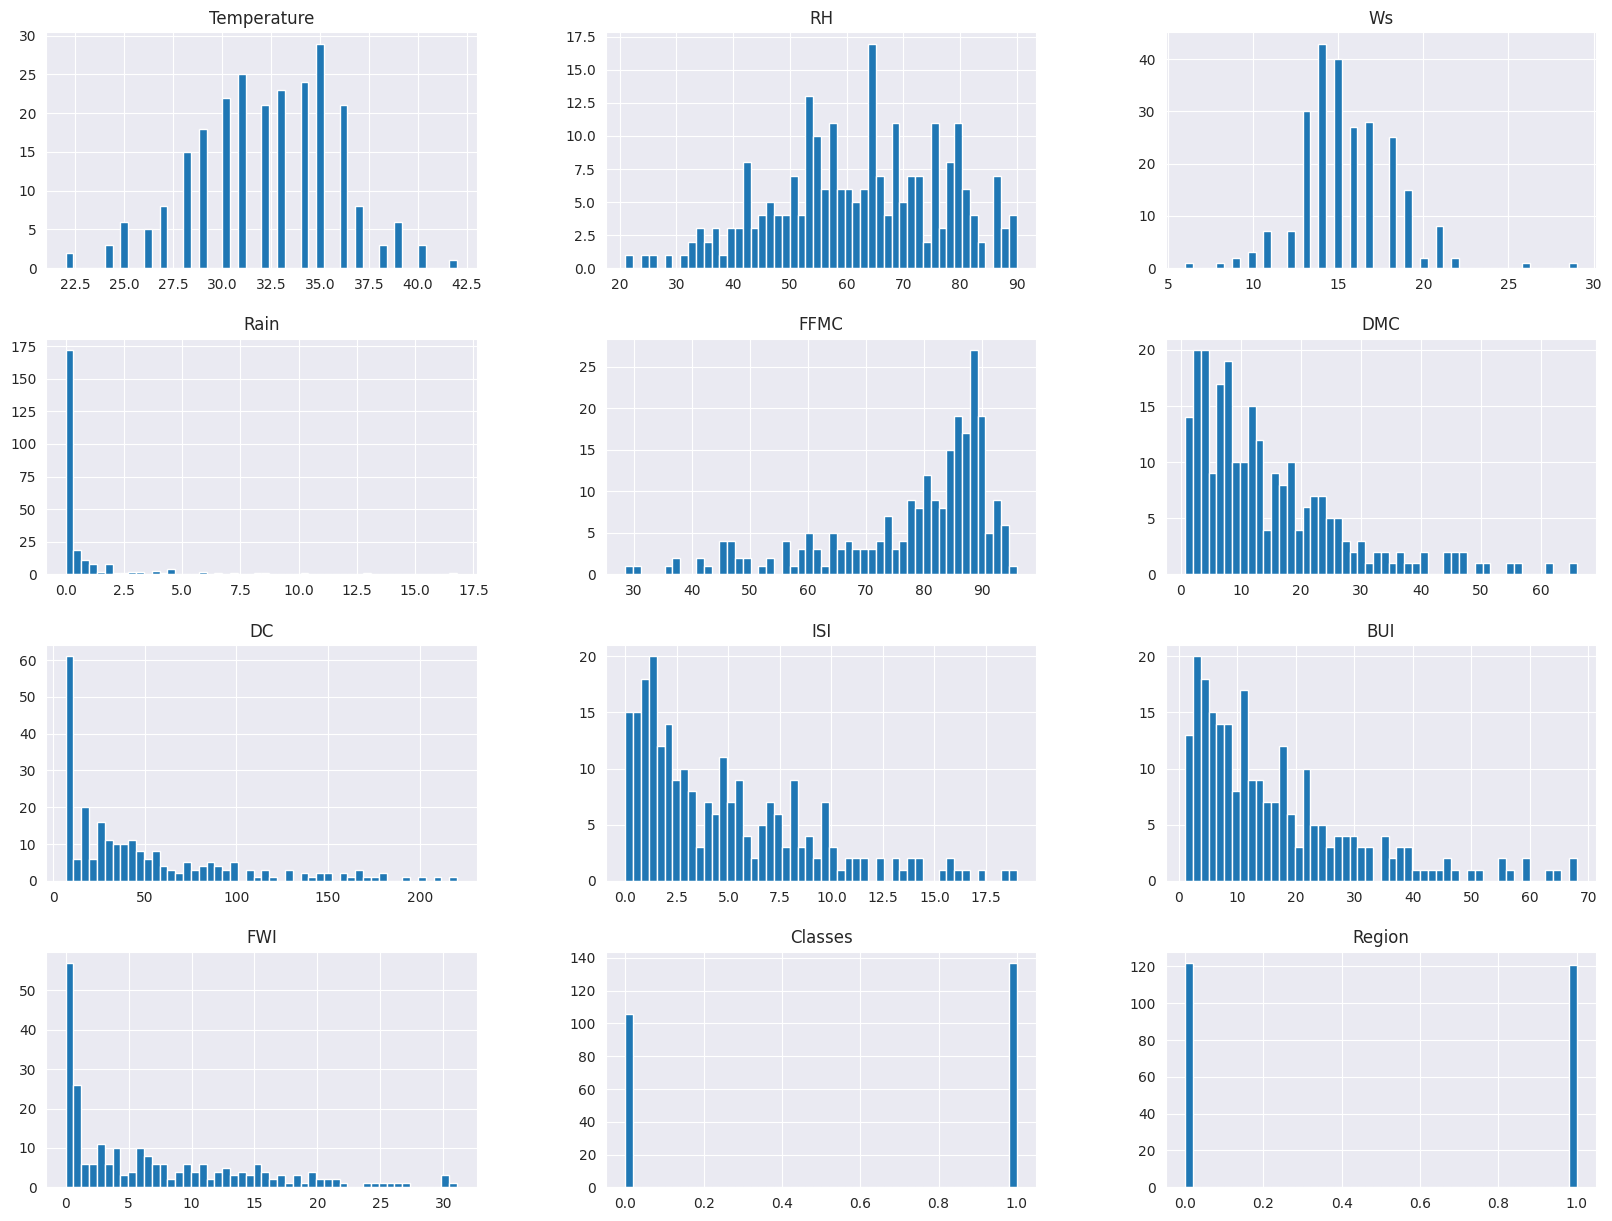

In [23]:
## Plot density for all features
sns.set_style('darkgrid')
df1.hist(bins = 50, figsize= (20,15))
plt.show()

In [24]:
## Percentage for Pie Chart
percentage = df1['Classes'].value_counts(normalize = True)*100

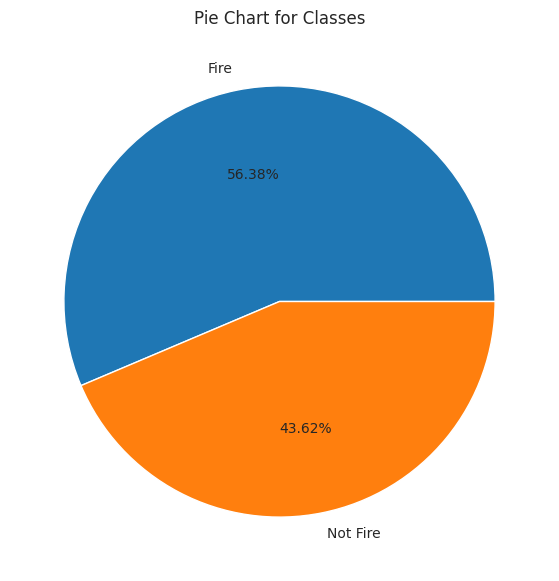

In [25]:
## Plotting piechart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels = classlabels, autopct='%1.2f%%')
plt.title('Pie Chart for Classes')
plt.show()

In [26]:
## Correlation
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

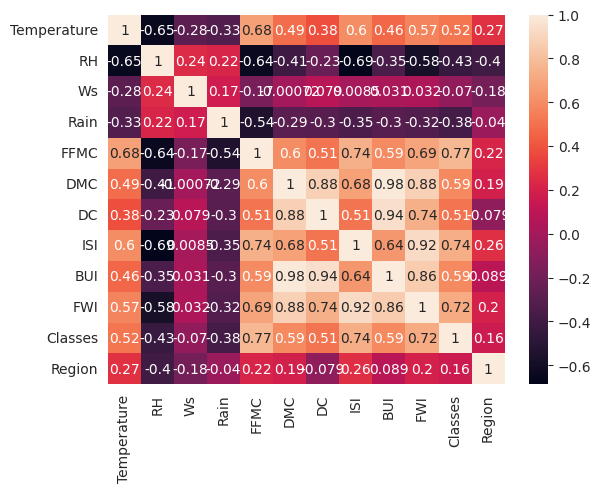

In [29]:
sns.heatmap(df1.corr(),annot=True)

<Axes: ylabel='FWI'>

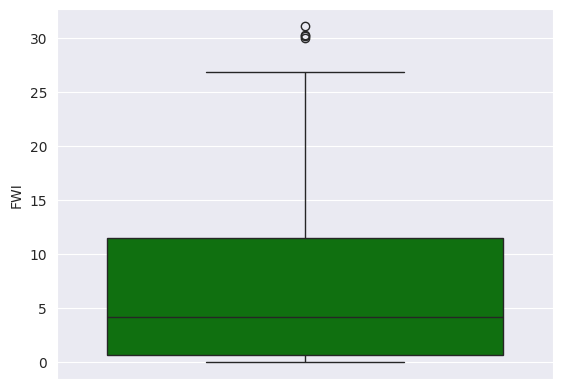

In [30]:
## Box Plots
sns.boxplot(df1['FWI'], color = 'green')

In [31]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [33]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Monthly Fire Analysis for Bejaia Region')

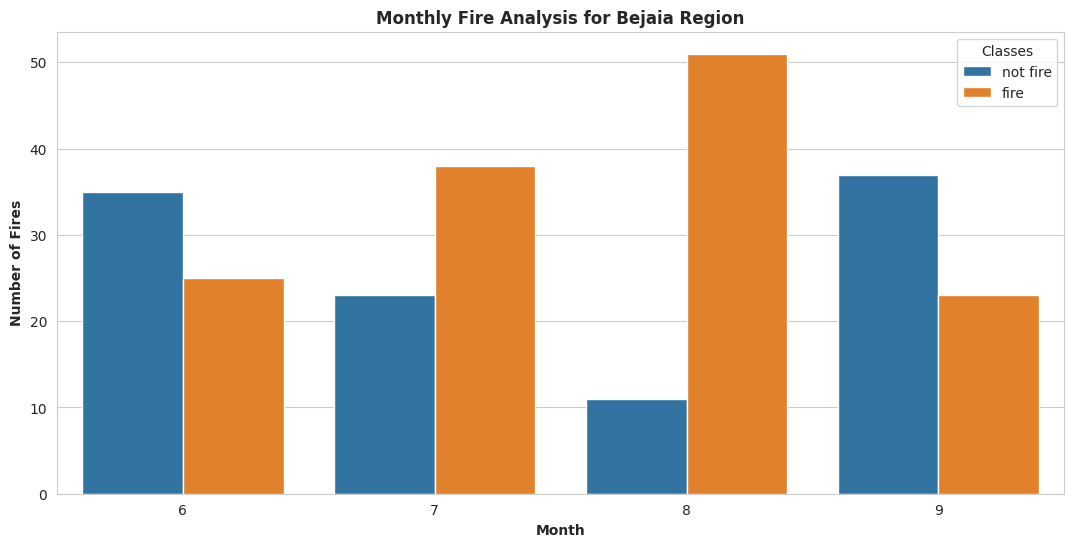

In [34]:
## Monthly Fire Analysis
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes',data = df)
plt.xlabel('Month',weight = 'bold')
plt.ylabel('Number of Fires',weight = 'bold')
plt.title('Monthly Fire Analysis for Bejaia Region',weight='bold')

Text(0.5, 1.0, 'Monthly Fire Analysis for Sidi-Bel Abbes Region')

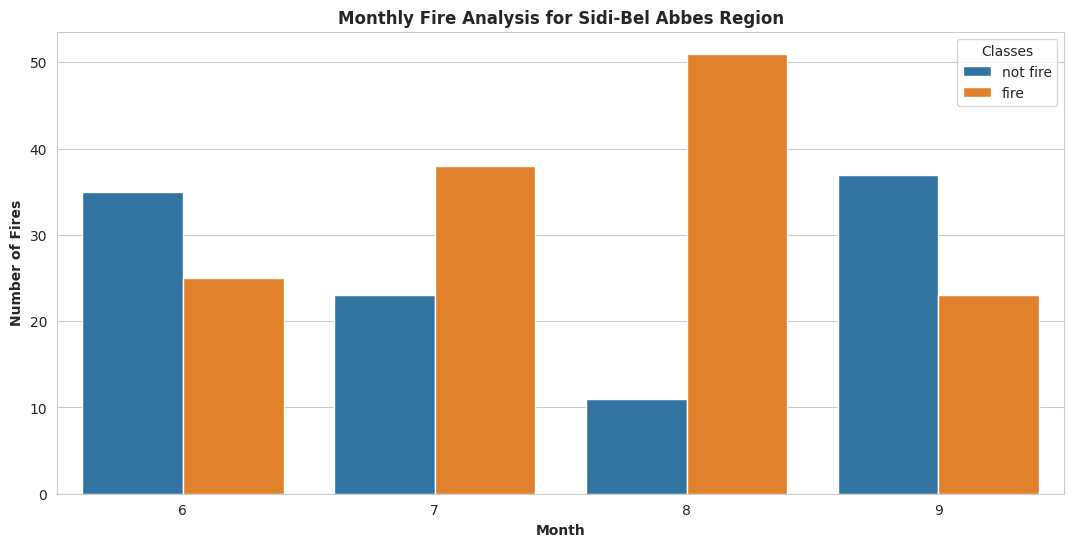

In [35]:
## Monthly Fire Analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes',data = df)
plt.xlabel('Month',weight = 'bold')
plt.ylabel('Number of Fires',weight = 'bold')
plt.title('Monthly Fire Analysis for Sidi-Bel Abbes Region',weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things.

Most of the fires happend in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September.

In [36]:
## Independent and Dependent feature.
x = df1.drop('FWI', axis = 1)
y = df1['FWI']

In [37]:
## Train Test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [38]:
## Feature Selection
xtrain.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

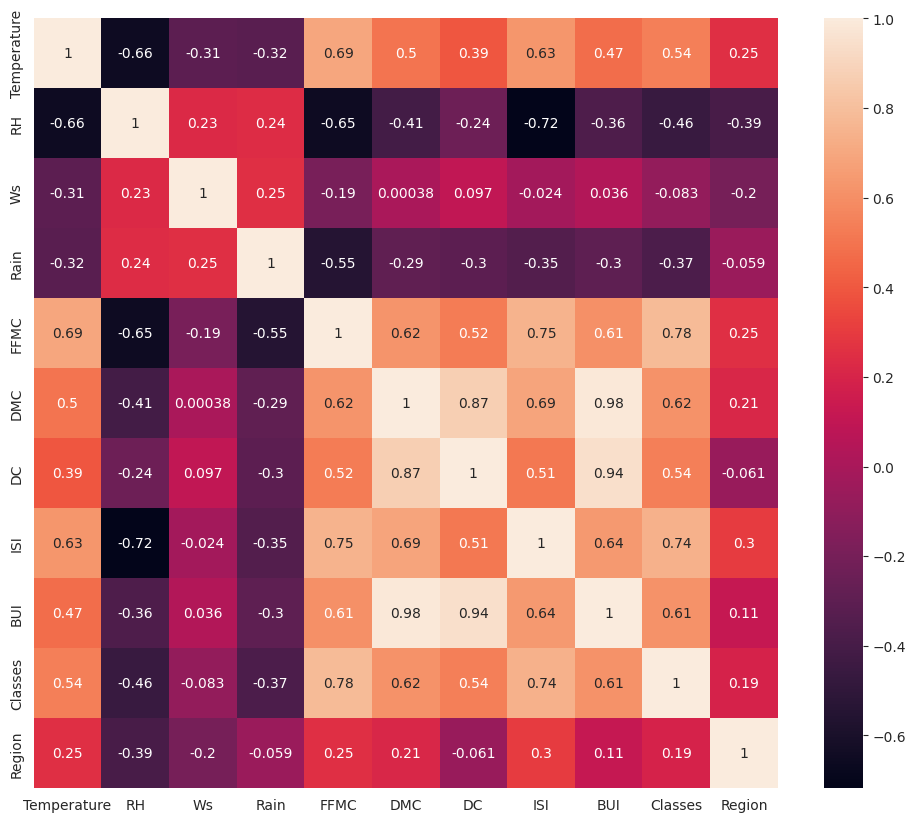

In [39]:
## Check for MultiCollinearity
plt.figure(figsize=(12,10))
corr = xtrain.corr()
sns.heatmap(corr,annot=True)

In [40]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:  # Using corr_matrix.iloc to access values by index
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [41]:
## Threshold
corr_features = correlation(xtrain, 0.85)
corr_features

{'BUI', 'DC'}

In [42]:
## drop features when correlation is more than 0.85
xtrain.drop(corr_features,axis = 1, inplace = True)
xtest.drop(corr_features,axis = 1, inplace = True)
xtrain.shape, xtest.shape

((182, 9), (61, 9))

In [43]:
xtrain.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


## Feature Scaling or Standardization

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [45]:
xtrain_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box Plot to understand effect of standard scaler

Text(0.5, 1.0, 'xtrain after scaling')

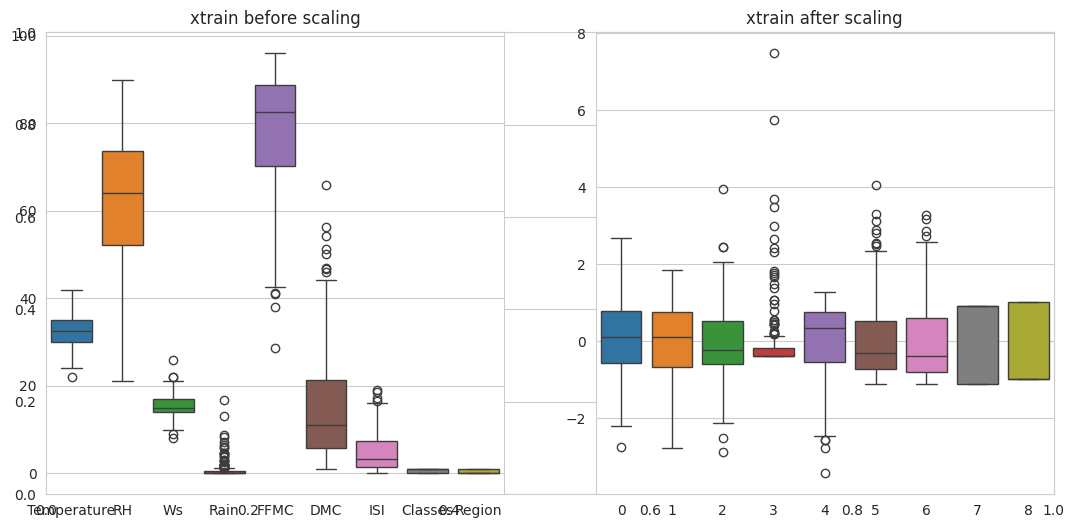

In [46]:
plt.subplots(figsize=(13,6))
plt.subplot(1,2,1)
sns.boxplot(data=xtrain)
plt.title('xtrain before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=xtrain_scaled)
plt.title('xtrain after scaling')

## Linear Regression Model

Mean Absolute Error 0.9939450225331374
R2 Score 0.9607056657860652


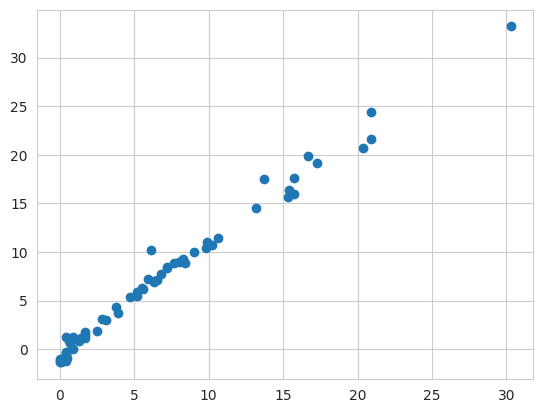

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
lin = LinearRegression()
lin.fit(xtrain_scaled, ytrain)
y_pred = lin.predict(xtest_scaled)
mae = mean_absolute_error(ytest,y_pred)
score = r2_score(ytest,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

## Apply the Lasso Regression

Mean Absolute Error 0.9605020166901078
R2 Score 0.9692970913627958


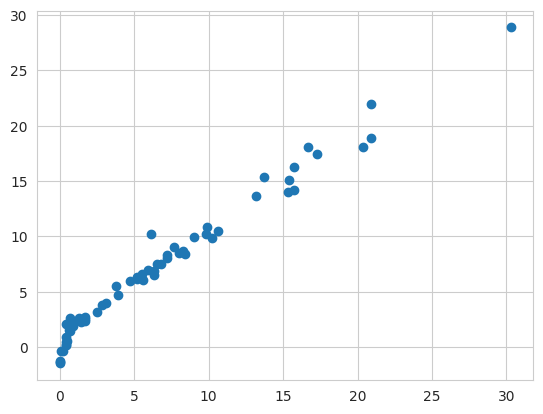

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error
lasso = Lasso()
lasso.fit(xtrain_scaled, ytrain)
y_pred = lasso.predict(xtest_scaled)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

### Cross Validation Lasso

In [49]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(xtrain_scaled, ytrain)
lassocv.predict(xtest_scaled)

array([ 8.86654967,  8.43070902, -0.90302841,  4.68098187,  7.24263344,
        1.32021928,  2.11367273,  8.21421082,  1.52734245,  3.22056904,
       -0.03995198, 10.37451129, 10.37998213, 19.03334817, 20.44720604,
        1.27831956,  1.0595027 , -1.60642915,  7.82928951,  3.04517588,
        1.69590846, -0.5307755 ,  7.08824382, -0.54402607, 24.2542425 ,
        5.38439947,  6.1122841 , 10.61847675, -1.76028475, 11.13429576,
        7.11541298, -0.99084734, 11.32786597, 15.83158382,  1.40129636,
        0.39904841,  1.773981  ,  6.21850149, -1.48167507, -1.38799102,
        6.73042232,  1.80848785,  9.14655355, -1.82642837, 17.49590209,
        9.00686547,  9.11856076,  0.88381183, 14.54700113,  0.69104367,
       32.69853037,  5.78355343, 19.75748534, 21.41628847, 15.48410921,
       17.30083201,  0.53603436, 10.05123875,  3.94212023, 16.19730883,
        5.57420484])

In [50]:
lassocv.alpha_

0.05725391318234408

In [54]:
lassocv.alphas_[:50]

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504])

In [57]:
lassocv.mse_path_[:50]

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error 0.9630024676566873
R2 Score 0.9611112947220234


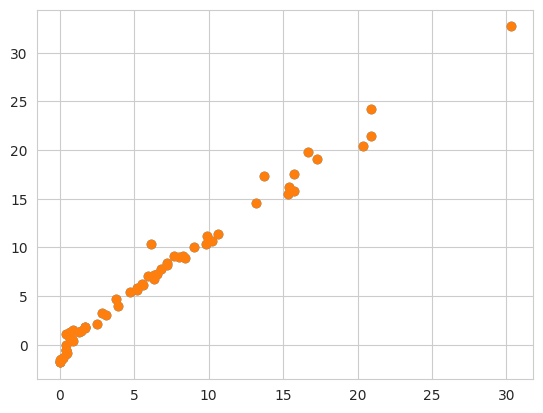

In [53]:
y_pred = lassocv.predict(xtest_scaled)
plt.scatter(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

## Apply the Ridge Regression

Mean Absolute Error 0.9862070802884405
R2 Score 0.9616458508455313


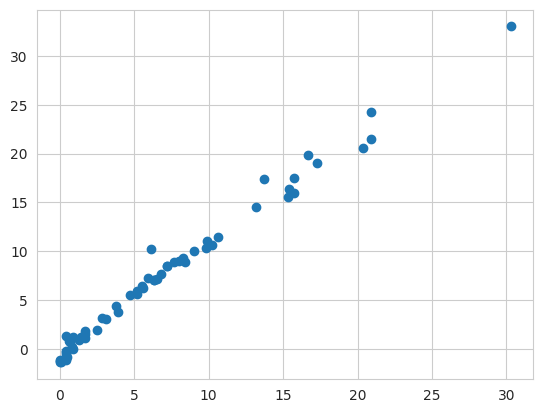

In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(xtrain_scaled, ytrain)
y_pred = ridge.predict(xtest_scaled)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

### Cross Validation Ridge Regression

Mean Absolute Error 0.9862070802884405
R2 Score 0.9616458508455313


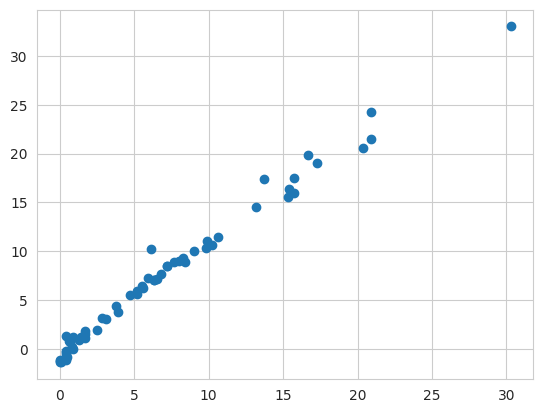

In [59]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(xtrain_scaled, ytrain)
ridgecv.predict(xtest_scaled)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

In [60]:
ridgecv.alpha_

1.0

In [61]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Apply the ElasticNet Regression

Mean Absolute Error 1.6511868133560943
R2 Score 0.9081701979826985


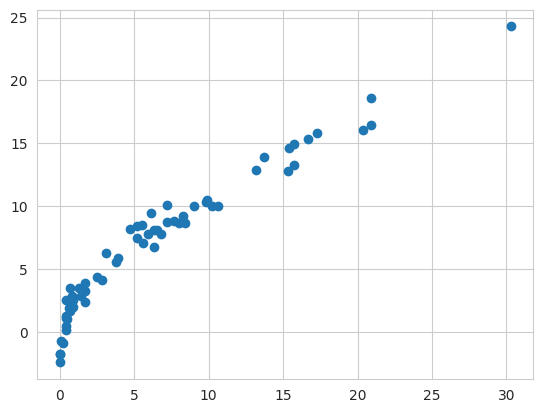

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(xtrain_scaled, ytrain)
y_pred = elastic.predict(xtest_scaled)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

### Cross Validation ElasticNet Regression

Mean Absolute Error 0.9658446127981584
R2 Score 0.9635664846226284


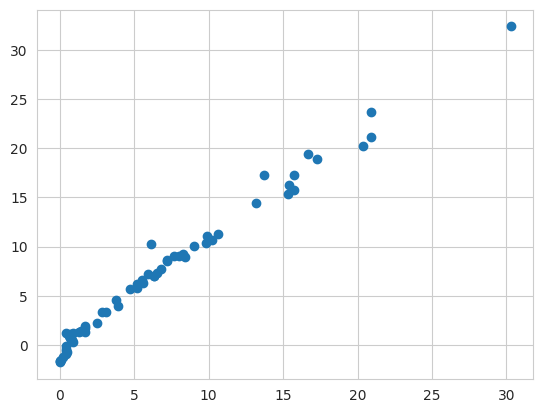

In [63]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(xtrain_scaled, ytrain)
y_pred=elasticcv.predict(xtest_scaled)
mae = mean_absolute_error(ytest, y_pred)
score = r2_score(ytest, y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)
plt.scatter(ytest, y_pred)

In [64]:
elasticcv.alpha_

0.04311146156383891

In [66]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## Pickle the machine learning models, preprocessing model StandardScaler

In [67]:
scaler

StandardScaler()

In [68]:
ridge

Ridge()

In [69]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))